<h1><center>Linear Regression</center></h1>

#### Overview
In the first part of this assignment, you will pre-process the given data.<br>
In the second part, you will implement Linear Regression as discussed in class.<br>
For Part 1, we will use 'googleplaystore.csv' dataset which contain information of application on the Google Play Store.<br>
For Part 2, we will use scaled down version of Boston house price dataset.
All datasets have been provided along with this .ipynb file on the classroom.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

## Part 1
### Data Pre-Processing and Visualization

In [2]:
# There is a series of tutorials on pandas library https://www.tutorialspoint.com/python_pandas/python_pandas_introduction.htm

# Load Dataset
data = pd.read_csv('googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
'''
Print the names of all columns in the dataset.
'''
# YOUR CODE HERE
data.columns


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
'''
Some "Rating" values are missing (NaN), fill them by taking the average of the "Rating" values in the rows above and below.
Incase the "Rating" value in the row below is also missing, use only the row above.
'''
# YOUR CODE HERE
data2 = data.copy()
print("Before... \n", data2.isnull().sum())
missing_ratings_index = data2[data2.Rating.isnull()].index

print("---"*5)

for indx in missing_ratings_index:
    if not np.isnan( data2.loc[indx-1, "Rating"]) :
        if not  np.isnan(data2.loc[indx+1, "Rating"]):                  
            avg = (data2.loc[indx-1, "Rating"] + data2.loc[indx+1, "Rating"])/2
            data2.loc[indx, "Rating"] = avg
        else:
            data2.loc[indx, "Rating"] = data2.loc[indx-1, "Rating"]

    
print("After... \n", data2.isnull().sum())



Before... 
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
---------------
After... 
 App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64


In [5]:
'''
Write a method to calculate the total profit (i.e. No. of installations x price) of all apps which have a
Rating of 4.3 or below.
You need to process the strings in the "Installs" and "Price" columns to retrieve their values as integers.
You need to sum up the individual profits for all apps that meet the above condition.
'''
#float( "".join( [ i for i in list("$10,000+") if i not in [",","$","+"] ] ) )
# YOUR CODE HERE
data2.head(5)
ratings_blw_4point3 = data2[data2["Rating"] <= 4.3]
profits = list()
for row in ratings_blw_4point3.iterrows():
    no_of_installs = row[1][5]
    price = row[1][7]
    no_of_installs = int( "".join( [ i for i in list(no_of_installs) if i not in [",","$","+"] ] ) )
    price = float( "".join( [ i for i in list(price) if i not in [",","$","+"] ] ) )
    profits.append(int(price * no_of_installs))

ratings_blw_4point3["Profit"] = profits
print("sum of all profits that meet above criteria: ", sum(profits))

sum of all profits that meet above criteria:  125048155


C:\Users\Nauman\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


34


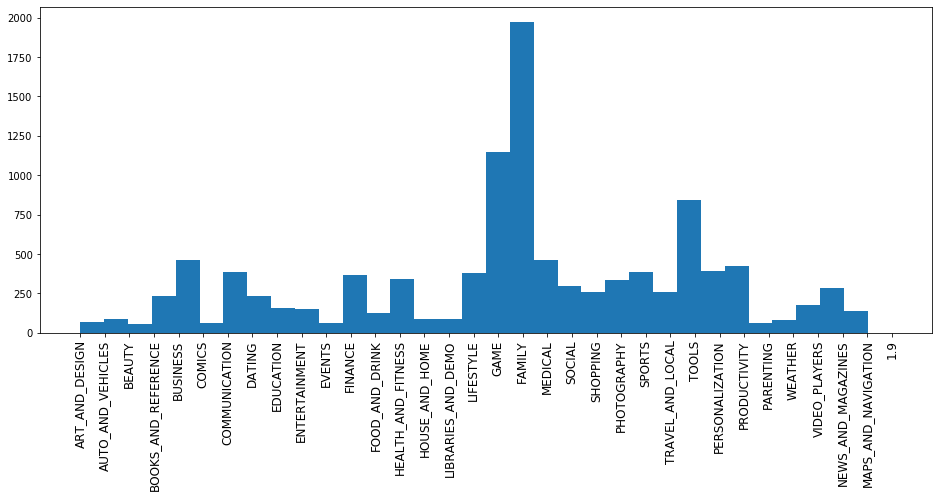

In [6]:
'''
Create a histogram of the total counts of each Category in the dataset.
'''
# YOUR CODE HERE
total_categories = len(data2.Category.unique())
print(total_categories)

ax = data2.Category.hist(figsize=(16,6), grid=False, xrot=90, xlabelsize=12, bins =total_categories )

Android Ver
1.0 and up            0.000000e+00
1.5 and up            6.182350e+04
1.6 and up            3.768736e+06
2.0 and up            1.109009e+06
2.0.1 and up          1.894244e+05
2.1 and up            8.324022e+05
2.2 - 7.1.1           0.000000e+00
2.2 and up            1.398355e+06
2.3 and up            2.488614e+07
2.3.3 and up          9.442051e+06
3.0 and up            1.070706e+07
3.1 and up            4.950000e+00
3.2 and up            6.139385e+04
4.0 and up            4.028438e+07
4.0.3 - 7.1.1         0.000000e+00
4.0.3 and up          4.959422e+07
4.1 - 7.1.1           0.000000e+00
4.1 and up            4.513077e+07
4.2 and up            9.224184e+06
4.3 and up            3.492658e+06
4.4 and up            2.024084e+07
4.4W and up           2.497900e+05
5.0 - 6.0             0.000000e+00
5.0 - 7.1.1           0.000000e+00
5.0 - 8.0             0.000000e+00
5.0 and up            9.015109e+06
5.1 and up            7.494900e+04
6.0 and up            2.017529e+04
7.0 - 7.

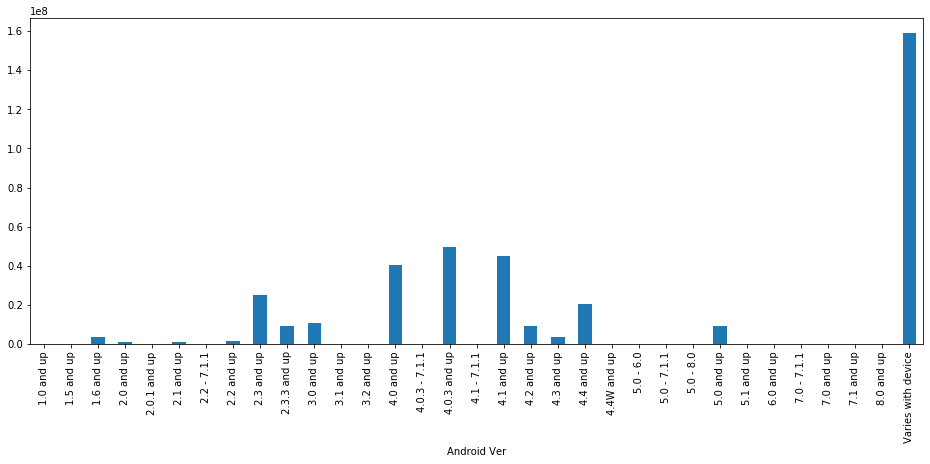

In [7]:
'''
Create a bar graph of profit generated by each android version.
'''
# YOUR CODE HERE
def remove_characters(string):
    return float( "".join( [ i for i in list(string) if i not in [",","$","+"] ] ) )

#print(data2["Android Ver"].unique())
data2.drop(10472, inplace=True)
profits = (data2.Price.apply(remove_characters) * data2.Installs.apply(remove_characters))
data2["Profit"] = profits
profits_graph = data2.groupby("Android Ver").Profit.sum()
print(profits_graph)
profits_graph.plot(kind='bar', figsize=(16,6))

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


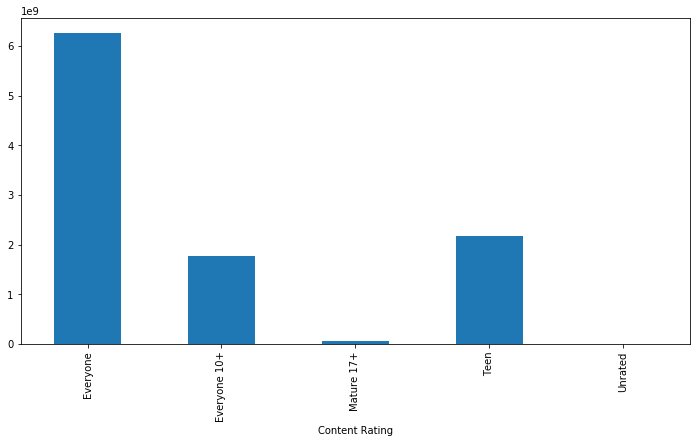

In [8]:
'''
For family category, plot number of installations against each content rating.
'''
# YOUR CODE HERE
print(data2.Category.unique())
data2.Installs = data2.Installs.apply(remove_characters)
no_installs = data2[data2.Category=="FAMILY"].groupby("Content Rating").Installs.sum()
no_installs.plot(kind='bar', figsize=(12,6))

# Part 2
### Linear Regression

The goal of this assignment is to develop your understanding of a basic Machine Learning model and learn some basic concepts such as how datasets are visualised and misc. We think that it is necessary to not only understand the mathematics behind the models but also to know how to convert that knowledge into code that can work.



Implementation detail of each step is given below.

In [9]:
# Load Dataset
(x_train, y_train), (x_test, y_test)= pickle.load( open( "dataset.pkl", "rb" ) )

#You can load the second dataset in similar fashion
(x_train_d2, y_train_d2), (x_test_d2, y_test_d2)= pickle.load( open( "dataset2.pkl", "rb" ) )

# to convert data from 2D i.e. N rows with 1 column to simple 1D N rows.
x_train.resize(len(x_train))
x_test.resize(len(x_test))
x_train_d2.resize(len(x_train_d2))
x_test_d2.resize(len(x_test_d2))


#### Part 2.a Linear Regression(without gradient descent) 

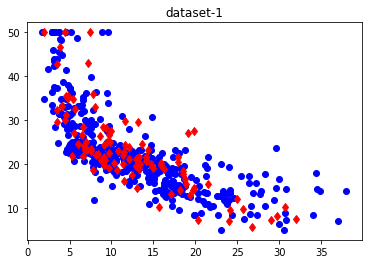

In [10]:
'''
Display training and testing dataset with different colors using matplotlib library.
'''
# YOUR CODE HERE
def ploting_data(x_train, y_train, x_test, y_test, name):
    plt.title(name)
    plt.plot(x_train,y_train,"bo")
    plt.plot(x_test,y_test,"rd")

ploting_data(x_train, y_train, x_test, y_test, "dataset-1")  


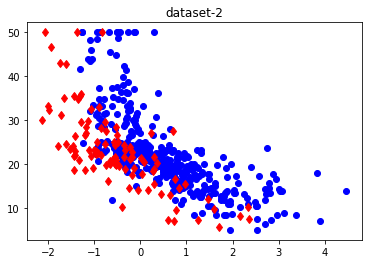

In [11]:
ploting_data(x_train_d2, y_train_d2, x_test_d2, y_test_d2, "dataset-2")  


<html5>
<img src="mse.png",width=250>
</html5>

<html5>
<img src="ls_mse.png",width=250>
</html5>

In [12]:
'''
Compute line parameters from training data. 
Compute 'm' and 'c' of line by formula given in the above equations.
a-hat is c and b-hat is m in equation y = mx + c
'''
# YOUR CODE HERE
def find_parametres(x_train, y_train):
    x_bar = x_train.sum() / len(x_train)
    y_bar = y_train.sum() / len(y_train)
    b_hat = sum( (x_train - x_bar) * (y_train-y_bar) ) / sum((x_train - x_bar)**2)
    a_hat = y_bar - (b_hat * x_bar)
    m = b_hat
    c = a_hat
    return m,c

m_d1 , c_d1 = find_parametres(x_train, y_train)
m_d2 , c_d2 = find_parametres(x_train_d2, y_train_d2)
print("For dataset_1:\nslope: ", m_d1, "intercept: ", c_d1)
print("For dataset_2:\nslope: ", m_d2, "intercept: ", c_d2)


For dataset_1:
slope:  -0.9278216902292562 intercept:  34.216255712624125
For dataset_2:
slope:  -6.238131127132846 intercept:  25.5263621729055


In [13]:
'''
Implement mean square error function. i.e err = mean_square_error(Y_actual, Y_predicted) 
where err is the mean square error of actual label (i.e. Y_actual) and predicted lable ( i.e. Y_predicted)
'''
def mean_square_error(y_actual, y_predicted):
    # YOUR CODE HERE
    return (1/len(y_actual))*sum((y_actual - y_predicted)**2)

In [14]:
'''
Compute mean square error from line using training data i.e. training error.
'''
# YOUR CODE HERE
train_predictions_d1 = [(m_d1*x + c_d1) for x in x_train ]
train_predictions_d2 = [(m_d2*x + c_d2) for x in x_train_d2]

train_error_d1 = mean_square_error(y_train, train_predictions_d1)
train_error_d2 = mean_square_error(y_train_d2, train_predictions_d2)

print("MSE for training by equation methond dataset 1 :", train_error_d1)
print("MSE for for training by equation methond dataset 2 :", train_error_d2)

MSE for training by equation methond dataset 1 : 39.429056363858884
MSE for for training by equation methond dataset 2 : 42.840198079698794


In [15]:
'''
Compute mean square error from line using test data i.e. test error.
'''
# YOUR CODE HERE
test_predictions_d1 = [(m_d1*x + c_d1) for x in x_test ]
test_predictions_d2 = [(m_d2*x + c_d2) for x in x_test_d2 ]

test_error_d1 = mean_square_error(y_test, test_predictions_d1)
test_error_d2 = mean_square_error(y_test, test_predictions_d2)

print("MSE for test data by equation methond dataset 1 :", test_error_d1)
print("MSE for test data by equation methond dataset 2 :", test_error_d2)

MSE for test data by equation methond dataset 1 : 34.87619673683118
MSE for test data by equation methond dataset 2 : 70.80834523792943


For dataset-1


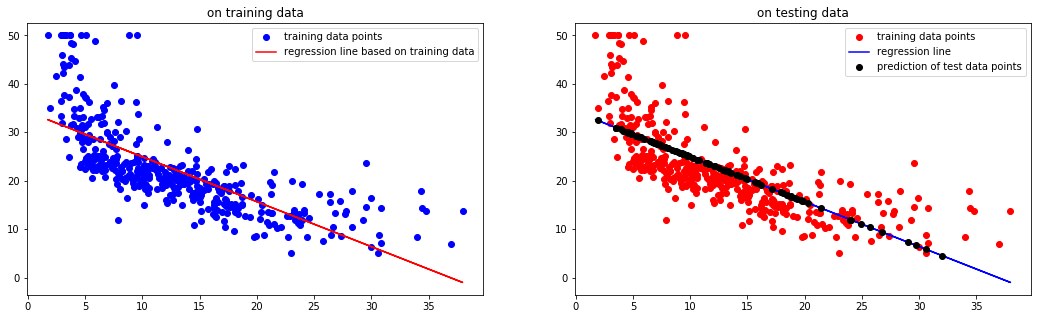

In [16]:
'''
Plot regression line on training and testing data separately.
'''
# YOUR CODE HERE
def plotting_line(x_train, y_train, x_test, y_test,train_predictions, test_predictions):
    
    plt.figure(figsize=(18,5))
    plt.subplot(121)
    plt.plot(x_train,y_train,"bo", label="training data points" )
    plt.plot(x_train,train_predictions,'r-', label="regression line based on training data")
    plt.title("on training data")
    plt.legend()

    plt.subplot(122)
    plt.plot(x_train,y_train,"ro", label="training data points")
    plt.plot(x_train,train_predictions,'b-', label="regression line")
    plt.plot(x_test,test_predictions,'ko', label="prediction of test data points")
    plt.title("on testing data")
    plt.legend()
 
print("For dataset-1")
plotting_line(x_train, y_train, x_test, y_test,train_predictions_d1, test_predictions_d1)

For dataset-2


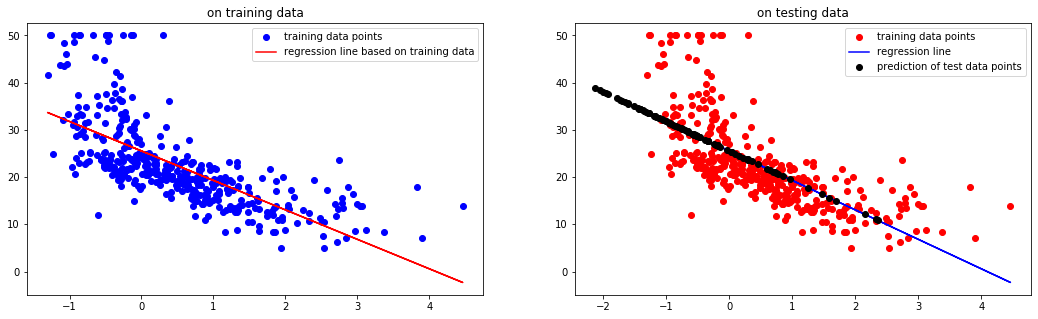

In [17]:
print("For dataset-2")
plotting_line(x_train_d2, y_train_d2, x_test_d2, y_test_d2, train_predictions_d2, test_predictions_d2)

#### Part 2.b Linear Regression (with gradient descent)

In [18]:
'''
Initialize parameters i.e. learning rates, initial values of line parameters and number of epochs.
'''
# YOUR CODE HERE
learning_rate = 0.001
epochs = 7000
thetas = np.random.rand(2)
theta0 = thetas[0]
theta1 = thetas[1]
n = len(x_train) #no of samples



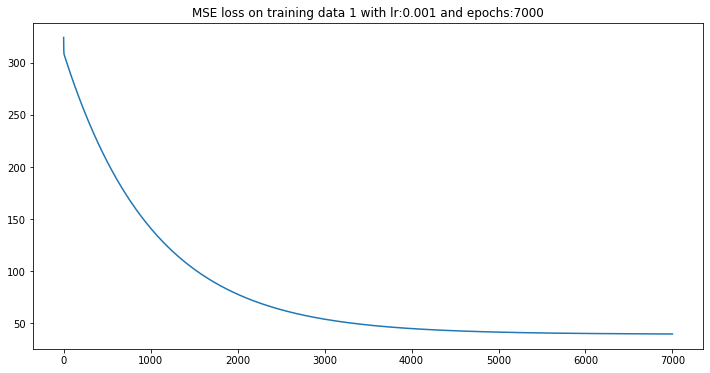

In [19]:
'''
Predict output and update parameters using stochastic gradient descent.
Compute mean square error in each iteration using mean_square_error function and plot on the graph using matplotlib library
'''
# YOUR CODE HERE
mse_list_d1 = list()
predictions_train_d1 = list()

plt.figure(figsize=(12,6))
plt.title("MSE loss on training data 1 with lr:{0} and epochs:{1}".format( learning_rate,epochs) )

for epoch in range(epochs):
    predictions_train_d1 = list()
    for ind, x in enumerate(x_train):
        y_hat = theta0 + (theta1 * x)
        predictions_train_d1.append(y_hat)
        theta0 = theta0 - (learning_rate * (-2/n)*(y_train[ind] - y_hat))
        theta1 = theta1 - (learning_rate * (-2/n)*(y_train[ind] - y_hat) * x)
    
    mse = mean_square_error(y_train, predictions_train_d1)

    mse_list_d1.append(mse)


plt.plot(mse_list_d1)
plt.savefig("Results/1_7.PNG")
plt.show()


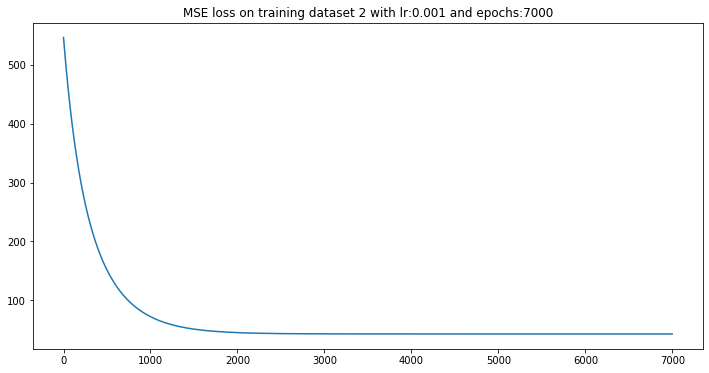

In [20]:
learning_rate = 0.001
epochs = 7000
thetas = np.random.rand(2)
theta0_d2 = thetas[0]
theta1_d2 = thetas[1]
n = len(x_train_d2) #no of samples


mse_list_d2 = list()
predictions_train_d2 = list()

plt.figure(figsize=(12,6))
plt.title("MSE loss on training dataset 2 with lr:{0} and epochs:{1}".format( learning_rate,epochs))

for epoch in range(epochs):
    predictions_train_d2 = list()
    for ind, x in enumerate(x_train_d2):
        y_hat = theta0_d2 + (theta1_d2 * x)
        predictions_train_d2.append(y_hat)
        theta0_d2 = theta0_d2 - (learning_rate * (-2/n)*(y_train_d2[ind] - y_hat))
        theta1_d2 = theta1_d2 - (learning_rate * (-2/n)*(y_train_d2[ind] - y_hat) * x)
    
    mse = mean_square_error(y_train, predictions_train_d2)

    mse_list_d2.append(mse)

plt.plot(mse_list_d2)
plt.savefig("Results/2_7.PNG")
plt.show()


In [21]:
'''
Compute mean square error of final trained parameters on testing data
'''
# YOUR CODE HERE
predictions_test_d1 = list()
for ind, x in enumerate(x_test):
        y_hat = theta0 + (theta1 * x)
        predictions_test_d1.append(y_hat)
        
mse_test_d1 = mean_square_error(y_test,predictions_test_d1)

predictions_test_d2 = list()
for ind, x in enumerate(x_test_d2):
        y_hat = theta0_d2 + (theta1_d2 * x)
        predictions_test_d2.append(y_hat)
        
mse_test_d2 = mean_square_error(y_test_d2,predictions_test_d2)

print("MSE on test for dataset-1: ", mse_test_d1)

print("MSE on test for dataset-2: ", mse_test_d2)

MSE on test for dataset-1:  36.050875078921486
MSE on test for dataset-2:  70.77035974123282


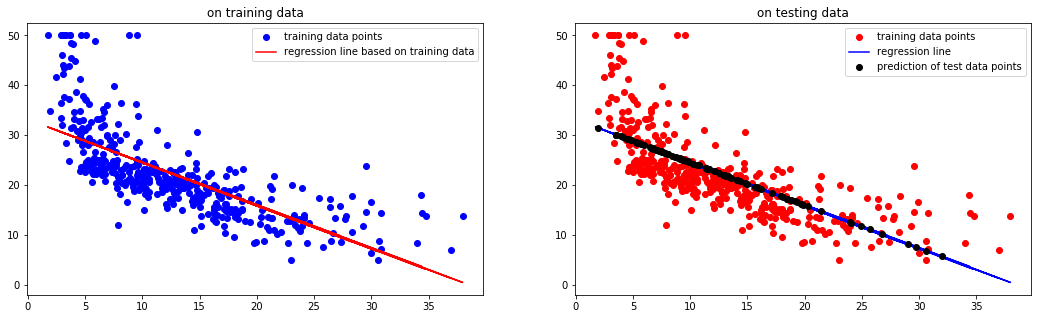

In [22]:
'''
Plot a regression line on the training and the testing data separately.
'''
# YOUR CODE HERE
plotting_line(x_train, y_train, x_test, y_test, predictions_train_d1, predictions_test_d1)

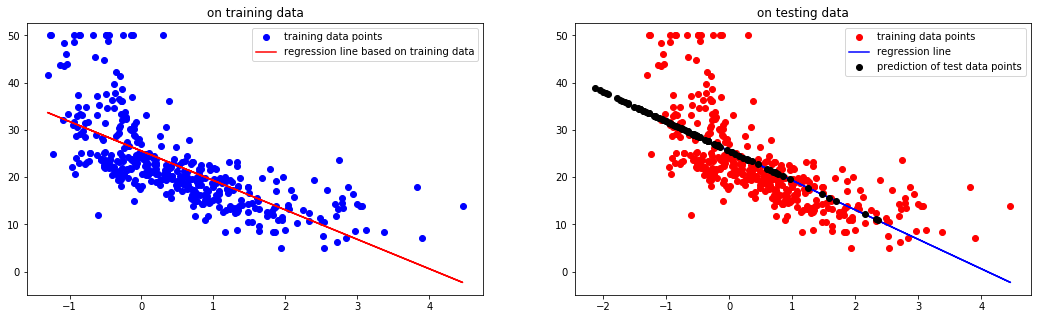

In [23]:
plotting_line(x_train_d2, y_train_d2, x_test_d2, y_test_d2, predictions_train_d2, predictions_test_d2)

**End of Notebook**